In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,11)})

In [114]:
data = pd.read_csv("../data/ssd_training_results.csv")

In [47]:
data.head(20)

,name,val,quality,type
0,classification_loss,2.352968,100,bmp
1,localization_loss,1.250106,100,bmp
2,Bicycle,0.002146,100,bmp
3,Bike_Bicycle_w/out_human,NaN,100,bmp
4,Bus,0.255653,100,bmp
5,Ignored,NaN,100,bmp
6,Motorbike,0.000000,100,bmp
7,PassengerCar,0.537846,100,bmp
8,Pedestrian,0.060617,100,bmp
9,Truck,0.412823,100,bmp


In [115]:
data["quality"] = data["quality"].map(str) + "% " + data["type"]
data

,name,val,quality,type
0,classification_loss,2.352968,100% bmp,bmp
1,localization_loss,1.250106,100% bmp,bmp
2,Bicycle,0.002146,100% bmp,bmp
3,Bike_Bicycle_w/out_human,NaN,100% bmp,bmp
4,Bus,0.255653,100% bmp,bmp
...,...,...,...,...
99,Pedestrian,0.037644,1% jpg,jpg
100,Truck,0.306344,1% jpg,jpg
101,Van,0.194870,1% jpg,jpg
102,mAP at 0.5IOU,0.398075,1% jpg,jpg


In [81]:
data_size = data["name"]=="Test+Train Data Size GB"
data_size = data[data_size]
data_size

,name,val,quality,type
12,Test+Train Data Size GB,274.0,100% bmp,bmp
25,Test+Train Data Size GB,51.0,100% jpg,jpg
38,Test+Train Data Size GB,4.0,40% jpg,jpg
51,Test+Train Data Size GB,3.5,30% jpg,jpg
64,Test+Train Data Size GB,2.9,20% jpg,jpg
77,Test+Train Data Size GB,2.3,10% jpg,jpg
90,Test+Train Data Size GB,1.9,5% jpg,jpg
103,Test+Train Data Size GB,1.8,1% jpg,jpg


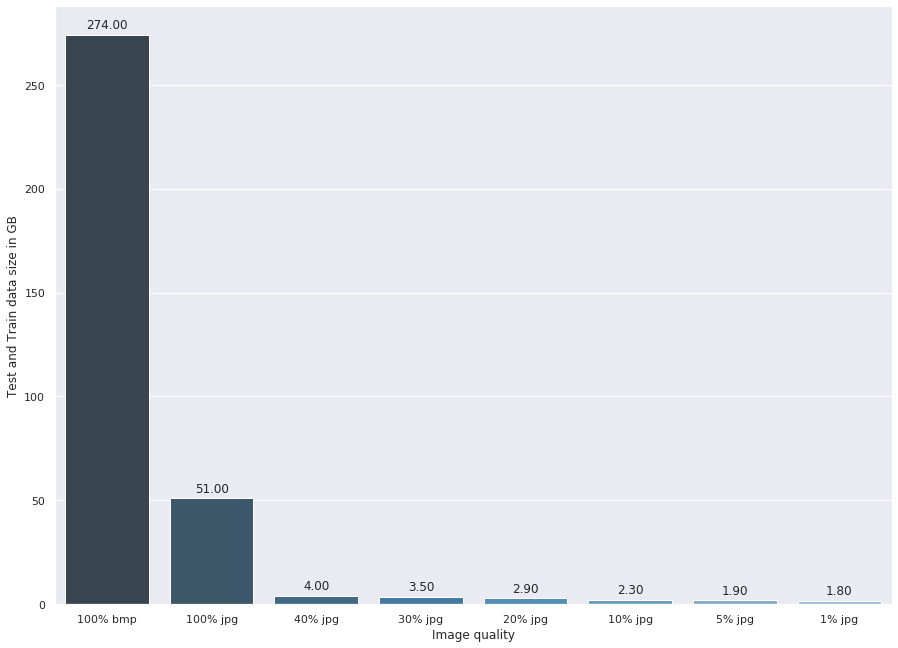

In [141]:
sns.set(rc={'figure.figsize':(15,11)})
ax = sns.barplot(x="quality", y="val", data=data_size, palette="Blues_d")
ax.set(xlabel='Image quality', ylabel='Test and Train data size in GB')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("img/data_size.png", dpi=600)

In [87]:
data_map = data["name"]=="mAP at 0.5IOU"
data_map = data[data_map]
data_map

,name,val,quality,type
11,mAP at 0.5IOU,0.482949,100% bmp,bmp
24,mAP at 0.5IOU,0.491519,100% jpg,jpg
37,mAP at 0.5IOU,0.488371,40% jpg,jpg
50,mAP at 0.5IOU,0.482633,30% jpg,jpg
63,mAP at 0.5IOU,0.477106,20% jpg,jpg
76,mAP at 0.5IOU,0.468544,10% jpg,jpg
89,mAP at 0.5IOU,0.441664,5% jpg,jpg
102,mAP at 0.5IOU,0.398075,1% jpg,jpg


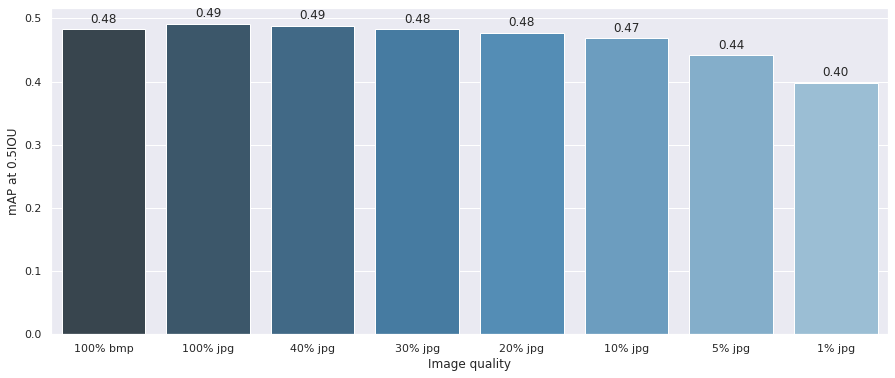

In [143]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="quality", y="val", data=data_map, palette="Blues_d")
ax.set(xlabel='Image quality', ylabel='mAP at 0.5IOU')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("img/data_map.png", dpi=600)

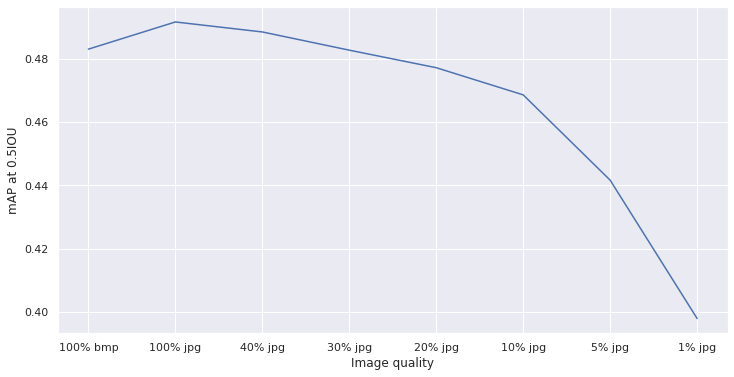

In [140]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.lineplot(x="quality", y="val", data=data_map, palette="Blues_d", sort=False)
ax.set(xlabel='Image quality', ylabel='mAP at 0.5IOU')
plt.savefig("img/data_map_line.png", dpi=600)

In [90]:
sns.set_color_codes("pastel")

In [95]:
data_ = data["name"]=="Bike_Bicycle_w/out_human"
data_ = data[data_]
data_

,name,val,quality,type
3,Bike_Bicycle_w/out_human,NaN,100% bmp,bmp
16,Bike_Bicycle_w/out_human,NaN,100% jpg,jpg
29,Bike_Bicycle_w/out_human,NaN,40% jpg,jpg
42,Bike_Bicycle_w/out_human,NaN,30% jpg,jpg
55,Bike_Bicycle_w/out_human,NaN,20% jpg,jpg
68,Bike_Bicycle_w/out_human,NaN,10% jpg,jpg
81,Bike_Bicycle_w/out_human,NaN,5% jpg,jpg
94,Bike_Bicycle_w/out_human,NaN,1% jpg,jpg


In [106]:
data_ = data["name"]=="Ignored"
data_ = data[data_]
data_

,name,val,quality,type
5,Ignored,NaN,100% bmp,bmp
18,Ignored,NaN,100% jpg,jpg
31,Ignored,NaN,40% jpg,jpg
44,Ignored,NaN,30% jpg,jpg
57,Ignored,NaN,20% jpg,jpg
70,Ignored,NaN,10% jpg,jpg
83,Ignored,NaN,5% jpg,jpg
96,Ignored,NaN,1% jpg,jpg


In [117]:
data = data[(data["name"]!="Ignored")&(data["name"]!="Bike_Bicycle_w/out_human")]

In [119]:
data_objects = data[(data["name"]!="mAP at 0.5IOU")
            &(data["name"]!="Test+Train Data Size GB")
           &(data["name"]!="classification_loss")
           &(data["name"]!="localization_loss")]

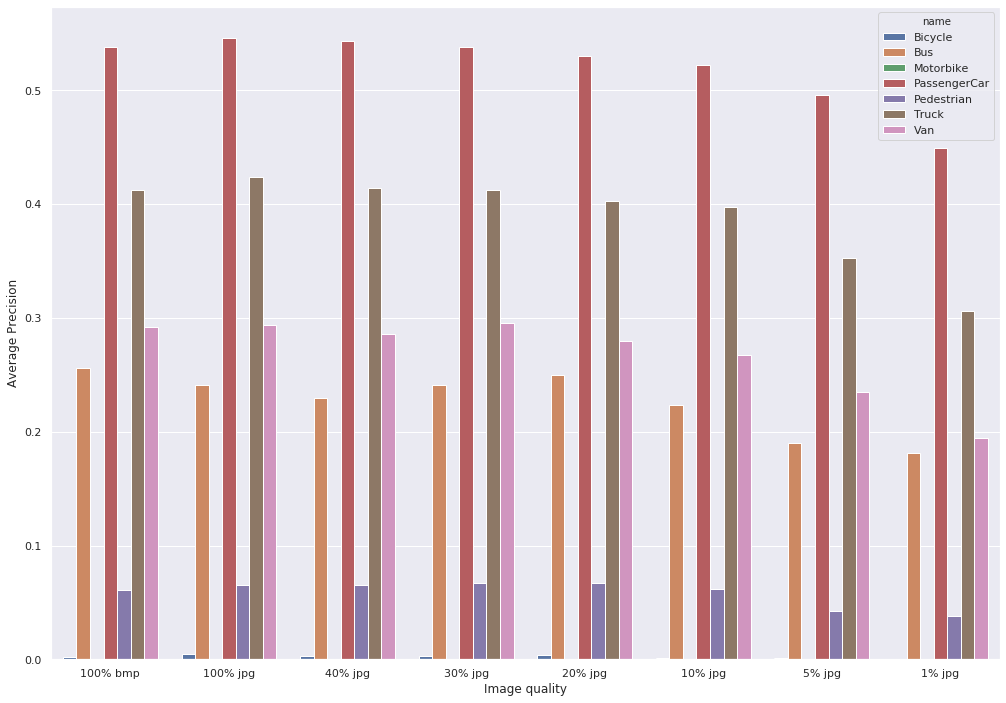

In [123]:
sns.set(rc={'figure.figsize':(17,12)})
ax = sns.barplot(x="quality", y="val", hue="name", data=data_objects)
ax.set(xlabel='Image quality', ylabel='Average Precision')
plt.savefig("img/data_ap_objects.png", dpi=600)

In [125]:
data_loss = data[data["name"]=="classification_loss"]
data_loss

,name,val,quality,type
0,classification_loss,2.352968,100% bmp,bmp
13,classification_loss,2.316056,100% jpg,jpg
26,classification_loss,2.361523,40% jpg,jpg
39,classification_loss,2.372779,30% jpg,jpg
52,classification_loss,2.411104,20% jpg,jpg
65,classification_loss,2.510747,10% jpg,jpg
78,classification_loss,2.697109,5% jpg,jpg
91,classification_loss,3.029760,1% jpg,jpg


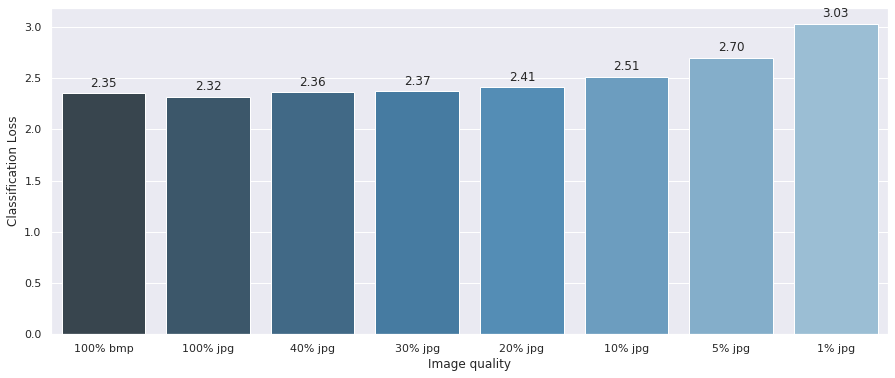

In [144]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="quality", y="val", data=data_loss, palette="Blues_d")
ax.set(xlabel='Image quality', ylabel='Classification Loss')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("img/data_loss.png", dpi=600)

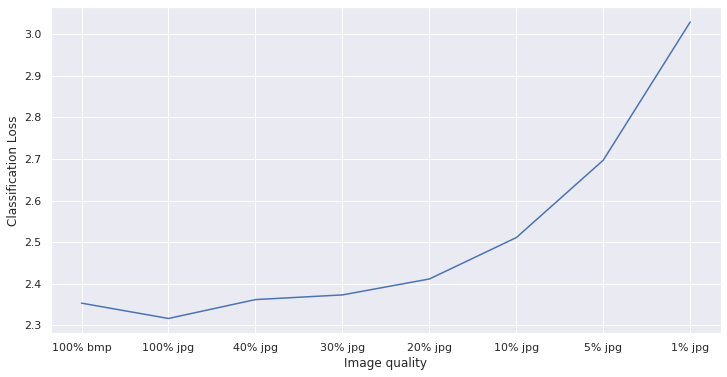

In [145]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.lineplot(x="quality", y="val", data=data_loss, palette="Blues_d", sort=False)
ax.set(xlabel='Image quality', ylabel='Classification Loss')
plt.savefig("img/data_loss_line.png", dpi=600)